In [13]:
from qiskit import *
%matplotlib inline

from qiskit.visualization import plot_histogram

In [2]:
hac=QuantumCircuit(3,2) # (no_of_qbits, no_of_cbits)


In [3]:
#preparing inputs
# by dwfault qbits have 0 state 
# to make them 1 state need to apply NOT gate i.e NOT <X>

hac.x(0) # qbit0
hac.x(1) # qbit1

#no changes to qbit2 
hac.barrier()


<bound method QuantumCircuit.barrier of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fc03422b8b0>>

In [4]:
# Applying AND  operation (Toffoli gate) <CCX>
# Giving 2 inputs for sum of qbit0 & qbit1 and output assigned to qbit2 to collect carry bit
hac.ccx(0,1,2)

hac.barrier()

In [5]:
#Applying XOR operation (CNOT gate) <cx>
# collect sum  bit of qbit0 and abit1
hac.cx(0,1)
hac.barrier()

In [6]:
# Reading output
hac.measure(1,0) #reading  XOR value sum bit
hac.measure(2,1) #reading  AND value carry bit

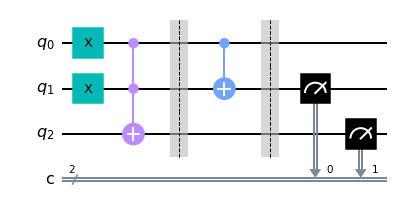

In [7]:
# visualize 
hac.draw(output='mpl')

In [8]:
# backend to connect quantum
sim=Aer.aer.get_backend('qasm_simulator')

In [9]:
# to run and store result
job_result=execute(experiments=hac,
                  backend=sim,
                  shots=1024).result()

In [10]:
job_result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='4e04fa3c-c52b-47f3-a463-d5f695a3becd', job_id='6c08f02e-5e8a-4e70-a9c2-04e253c2a74c', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=3, name='circuit-0', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=497987218, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 3, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'statevector', 'active_input_qubits': [0, 1, 2], 'num_clbits': 2, 'input_qubit_map': [[2, 2], [0, 0], [1, 1]], 'fusion': {'applied': False, 'max_fused_qubits': 5, 'enabled': True, 'threshold': 14}}, time_taken=0.049127474)], date=2

In [11]:
job_result.get_counts()

{'10': 1024}

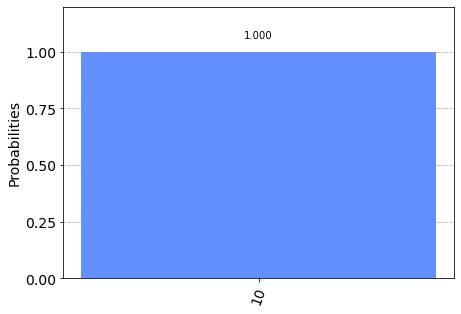

In [14]:
plot_histogram(job_result.get_counts())